# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [103]:

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data:

In [104]:
df = pd.read_csv('/content/drive/MyDrive/AI_Assignment/AI_ASSIGNMENTS/ionosphere_data.txt')

In [105]:
df.shape

(351, 35)

It's clear from the shape of the data that dataset is not a huge one. Only 351 records are available with 34 features/columns.

In [106]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature1,351.0,0.891738,0.311155,0.0,1.000000,1.00000,1.000000,1.0
feature2,351.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
feature3,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
feature4,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
feature5,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
feature6,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
feature7,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
feature8,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
feature9,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
feature10,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0


In [108]:
for feature in df:
    print(feature)
    print(len(df[feature].unique()))

feature1
2
feature2
1
feature3
219
feature4
269
feature5
204
feature6
259
feature7
231
feature8
260
feature9
244
feature10
267
feature11
246
feature12
269
feature13
238
feature14
266
feature15
234
feature16
270
feature17
254
feature18
280
feature19
254
feature20
266
feature21
248
feature22
265
feature23
248
feature24
264
feature25
256
feature26
273
feature27
256
feature28
281
feature29
244
feature30
266
feature31
243
feature32
263
feature33
245
feature34
263
label
2


In [109]:
df['feature2'].unique()

array([0])

In [110]:
df.drop(df.columns[1], inplace=True, axis=1)

In [111]:

df.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [112]:
df.ndim

2

In [113]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature3   351 non-null    float64
 2   feature4   351 non-null    float64
 3   feature5   351 non-null    float64
 4   feature6   351 non-null    float64
 5   feature7   351 non-null    float64
 6   feature8   351 non-null    float64
 7   feature9   351 non-null    float64
 8   feature10  351 non-null    float64
 9   feature11  351 non-null    float64
 10  feature12  351 non-null    float64
 11  feature13  351 non-null    float64
 12  feature14  351 non-null    float64
 13  feature15  351 non-null    float64
 14  feature16  351 non-null    float64
 15  feature17  351 non-null    float64
 16  feature18  351 non-null    float64
 17  feature19  351 non-null    float64
 18  feature20  351 non-null    float64
 19  feature21  351 non-null    float64
 20  feature22 

In [77]:
'''for feature in df:
    print(feature)
    df[feature].hist()
    plt.show()'''

# df.hist()
# plt.show()

'for feature in df:\n    print(feature)\n    df[feature].hist()\n    plt.show()'

In [114]:
# Check summary statistics
df.describe()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.

In [115]:
# Find missing values
df.isnull().sum()

feature1     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [116]:
df['label'] = [1 if lbl == 'g' else 0 for lbl in df['label']]

In [117]:

train_data = df.sample(frac= 0.6, random_state=125)
test_data = df.drop(train_data.index)

In [118]:
train_label = train_data.iloc[:,-1]
train_data = train_data.iloc[:,0:-1]
test_label = test_data.iloc[:,-1]
test_data = test_data.iloc[:,0:-1]

In [119]:
# df.drop(columns= 'label', inplace = True)

In [120]:

train_data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
270,1,1.00000,0.08013,0.96775,-0.00482,0.96683,-0.00722,0.87980,-0.03923,1.00000,0.01419,0.96186,-0.01436,0.95947,-0.01671,0.98497,0.01002,0.91152,-0.08848,0.95016,-0.02364,0.94636,-0.02591,0.98164,0.02003,0.93772,-0.03034,1.00000,-0.05843,0.92774,-0.03464,0.92226,-0.03673
116,1,1.00000,-0.14754,1.00000,0.04918,0.57377,-0.01639,0.65574,0.01639,0.85246,-0.03279,0.72131,0.00000,0.68852,-0.16393,0.19672,-0.14754,0.65558,-0.17176,0.67213,0.03279,1.00000,-0.29508,0.31148,-0.34426,0.52385,-0.20325,0.32787,-0.03279,0.27869,-0.44262,0.49180,-0.06557
135,1,0.89706,0.38235,0.91176,0.37500,0.74265,0.67647,0.45588,0.77941,0.19118,0.88971,-0.02206,0.86029,-0.20588,0.82353,-0.37500,0.67647,-0.50000,0.47794,-0.73529,0.38235,-0.86029,0.08824,-0.74265,-0.12500,-0.67925,-0.24131,-0.55147,-0.42647,-0.44118,-0.50735,-0.28676,-0.56618
91,1,0.84557,-0.08580,-0.31745,-0.80553,-0.08961,-0.56435,0.80648,0.04576,0.89514,-0.00763,-0.18494,0.63966,-0.20019,-0.68065,0.85701,-0.11344,0.77979,-0.15729,-0.06959,0.50810,-0.34128,0.80934,0.78932,-0.03718,0.70882,-0.25288,0.77884,-0.14109,-0.21354,-0.78170,-0.18494,-0.59867
100,1,1.00000,-1.00000,0.00000,0.00000,0.77941,-0.99265,0.80882,0.55147,-0.41912,-0.94853,0.00000,0.00000,0.00000,0.00000,0.72059,-0.77206,0.73529,-0.60294,0.00000,0.00000,0.18382,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,0.00000,0.00000


In [121]:
train_label

270    1
116    0
135    1
91     0
100    0
      ..
213    1
161    1
141    1
59     0
113    1
Name: label, Length: 211, dtype: int64

Standardized the Input Variables. Hint: Centeralized the data

In [122]:
# Normalize the data
train_mean = train_data.mean()
train_data -= train_mean
train_std = train_data.std()
train_data /= train_std
test_data -= train_mean
test_data /= train_std

Encode labels.



*  Shuffle the data if needed.







*  Split into 60 and 40 ratio.




In [123]:
# Now sample the dataframe

In [124]:
train_data.shape

(211, 33)

In [125]:
test_data.shape

(140, 33)

In [126]:
train_label.shape

(211,)

In [127]:
test_label.shape

(140,)

In [128]:
train_label.sum()

140

In [129]:

len(train_label)

211

In [130]:
train_label.sum()/len(train_label)

0.6635071090047393

Data Preprocessing

In [131]:
train_data = train_data.to_numpy()

In [132]:
train_label = train_label.to_numpy().astype('float32')

In [133]:
test_data = test_data.to_numpy()

In [134]:
test_label = test_label.to_numpy().astype('float32')

In [135]:
#train_set = np.array(train_set.as_matrix())
#train_label = np.array(pd.DataFrame(train_label).as_matrix())

In [136]:
print(type(train_data))
print(type(train_label))
print(type(test_data))
print(type(test_label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [137]:
print(train_data.dtype)
print(train_label.dtype)
print(test_label.dtype)
print(test_data.dtype)

float64
float32
float32
float64


Model Architecture



*   Model : 1 hidden layers including 16 unit.
  



In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,  activation='sigmoid'))


In [139]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               4352      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________




*   Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)




In [140]:
from tensorflow.keras import optimizers

model.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics=['accuracy'])



*   Train the Model with Epochs (100).




In [141]:

history = model.fit(train_data, train_label, validation_split=0.25, epochs= 75, batch_size = 32)

Epoch 1/75
5/5 [==============================] - 1s 52ms/step - loss: 0.6676 - accuracy: 0.5733 - val_loss: 0.4633 - val_accuracy: 0.9057
Epoch 2/75
5/5 [==============================] - 0s 11ms/step - loss: 0.5322 - accuracy: 0.6965 - val_loss: 0.3620 - val_accuracy: 0.8868
Epoch 3/75
5/5 [==============================] - 0s 11ms/step - loss: 0.4543 - accuracy: 0.8492 - val_loss: 0.3087 - val_accuracy: 0.9245
Epoch 4/75
5/5 [==============================] - 0s 11ms/step - loss: 0.3339 - accuracy: 0.8762 - val_loss: 0.2684 - val_accuracy: 0.9434
Epoch 5/75
5/5 [==============================] - 0s 10ms/step - loss: 0.3306 - accuracy: 0.8792 - val_loss: 0.2479 - val_accuracy: 0.9623
Epoch 6/75
5/5 [==============================] - 0s 9ms/step - loss: 0.3164 - accuracy: 0.8920 - val_loss: 0.2169 - val_accuracy: 0.9623
Epoch 7/75
5/5 [==============================] - 0s 10ms/step - loss: 0.2797 - accuracy: 0.9109 - val_loss: 0.1958 - val_accuracy: 0.9623
Epoch 8/75
5/5 [============

In [142]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

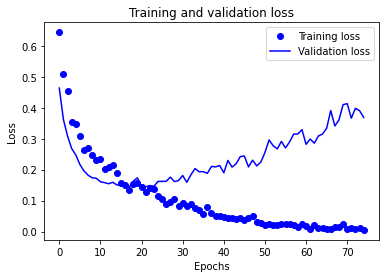

In [143]:

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(75)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

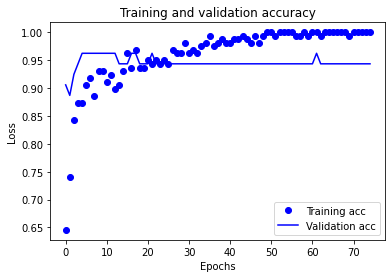

In [144]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



*   Evaluation Step
*   Prediction



In [145]:
score = model.evaluate(test_data, test_label)

5/5 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.9357


In [146]:

score

[0.4182048439979553, 0.9357143044471741]



*   If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
*   Prediction should be > 92%



In [147]:
predictions=model.predict(test_data)

In [148]:
predictions

array([[9.9775028e-01],
       [9.9995613e-01],
       [1.2681063e-10],
       [2.0685792e-04],
       [9.9999738e-01],
       [9.9999702e-01],
       [9.9997306e-01],
       [1.2155307e-04],
       [9.9999046e-01],
       [4.5760010e-13],
       [9.9999762e-01],
       [1.2542429e-15],
       [9.9999183e-01],
       [9.9993861e-01],
       [3.3031466e-08],
       [4.0411837e-06],
       [2.5352609e-01],
       [9.9998105e-01],
       [9.9999464e-01],
       [2.3944885e-10],
       [1.7913294e-08],
       [5.8610789e-07],
       [7.4982345e-03],
       [4.9543702e-10],
       [9.9946702e-01],
       [9.9999678e-01],
       [2.5373632e-08],
       [9.9994767e-01],
       [9.9998796e-01],
       [9.9999958e-01],
       [9.9999726e-01],
       [1.6565621e-03],
       [3.6697902e-08],
       [9.9999106e-01],
       [5.1840875e-11],
       [1.0000000e+00],
       [5.2424207e-09],
       [9.9970663e-01],
       [9.9945819e-01],
       [9.9995160e-01],
       [9.5080519e-01],
       [1.178896

In [149]:
y_pred = (predictions > 0.5)

In [150]:
y_pred

array([[ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [151]:
tf.math.confusion_matrix(
    test_label, y_pred, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[47,  8],
       [ 1, 84]], dtype=int32)>

In [152]:

# It will evaluate the logical expression y_predict>0.25 and return True or False

In [153]:
np.count_nonzero(y_pred)

92